In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dt = pd.read_csv("diamonds_new.csv")

In [4]:
dt

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [5]:
#Removing zero values in x y z being physical size dimensions
dt = dt[~((dt['x'] == 0 )| (dt['y'] == 0) | (dt['z']== 0))]

In [6]:
dt

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [7]:
#Checking for null values
dt.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53932 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53833 non-null  float64
 1   cut        53932 non-null  object 
 2   color      53876 non-null  object 
 3   clarity    53932 non-null  object 
 4   table      53869 non-null  float64
 5   x          53932 non-null  float64
 6   y          53932 non-null  float64
 7   z          53932 non-null  float64
 8   price_new  53932 non-null  float64
dtypes: float64(6), object(3)
memory usage: 4.1+ MB


In [9]:
###  TREATING MISSING VALUES

dt['carat']

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53932, dtype: float64

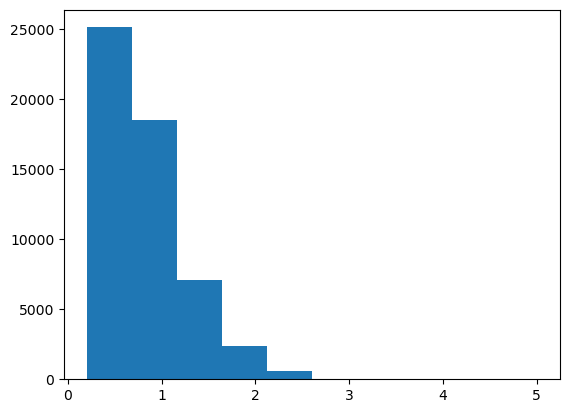

In [10]:
#PLOTTING DISTRIBUTION OF CARAT 
plt.hist(dt['carat'])
plt.show()

In [11]:
#FILLING NULL VALUES WITH MEDIAN FOR THE DISTRIBUTION IS SKEWED
median_carat = dt['carat'].median()

In [12]:
dt['carat'] = dt['carat'].fillna(median_carat)

C:\Users\mebin\AppData\Local\Temp\ipykernel_4432\2045211264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['carat'] = dt['carat'].fillna(median_carat)


In [14]:
##RECHECKING NULL VALUES
dt.isna().sum()

carat         0
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [15]:
dt['color'].nunique()

7

In [16]:
dt['color'].value_counts()

G    11234
E     9797
F     9539
H     8302
D     6774
I     5422
J     2808
Name: color, dtype: int64

In [20]:
#FILLING NULL VALUES OF COLOR WITH MODE VALUE
mode_color= dt['color'].mode()

In [24]:
dt['color'] = dt['color'].fillna(str(mode_color))

C:\Users\mebin\AppData\Local\Temp\ipykernel_4432\3706472348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['color'] = dt['color'].fillna(str(mode_color))


In [26]:
##RECHECKING NULL VALUES
dt.isna().sum()

carat         0
cut           0
color         0
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

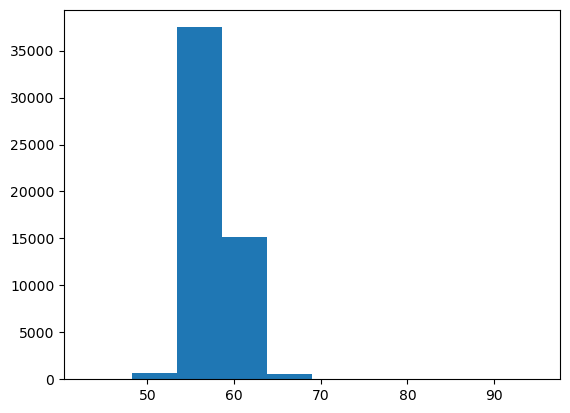

In [27]:
###PLOTTING DISTRIBUTION OF TABLE
plt.hist(dt['table'])
plt.show()

In [28]:
#FILLING NULL VALUES OF TABLE WITH MEAN VALUE
mean_table = dt['table'].mean()

In [29]:
dt['table'] = dt['table'].fillna(mean_table)

C:\Users\mebin\AppData\Local\Temp\ipykernel_4432\3398742468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['table'] = dt['table'].fillna(mean_table)


In [30]:
##RECHECKING NULL VALUES
dt.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [31]:
####OUTLIER TREATMENT

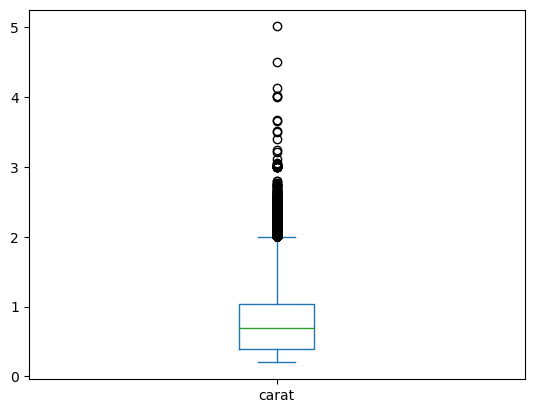

In [32]:
## PLOTTING BOXPLOT OF CARAT TO CHECK FOR OUTLIERS
dt['carat'].plot(kind = 'box')
plt.show()

In [33]:
##IQR METHOD FOR CAPPING VALUES

In [34]:
#CAPPING VALUES FOR OUTLIERS OF CARAT

In [35]:
Q1 = dt['carat'].quantile(0.25)
Q2 = dt['carat'].quantile(0.5)
Q3 = dt['carat'].quantile(0.75)

IQR = Q3 - Q1
LC = Q1 - (1.5 * IQR)
UC = Q3 + (1.5 * IQR)

dt = dt[(dt['carat']> LC) & (dt['carat']< UC)]

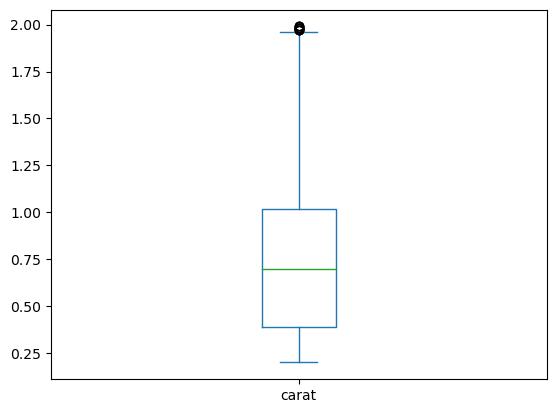

In [36]:
###RECHECKING OUTLIERS OF CARAT
dt['carat'].plot(kind = 'box')
plt.show()

In [37]:
#RECHECKING SIZE AFTER OUTLIERS REMOVAL
dt.shape

(51779, 9)

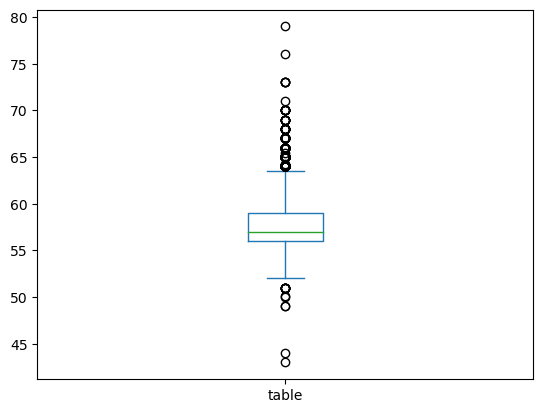

In [38]:
###PLOTTING BOXPLOT OF TABLE TO CHECK FOR OUTLIERS
dt['table'].plot(kind = 'box')
plt.show()

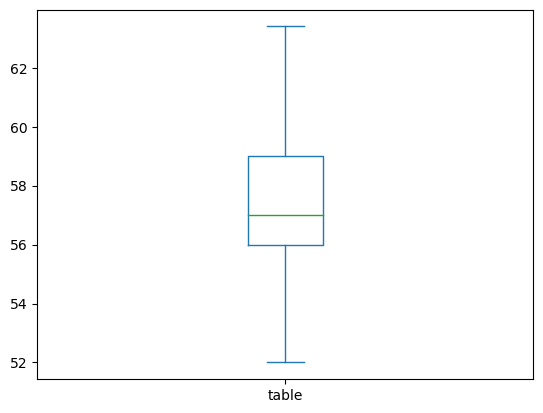

In [39]:
Q1 = dt['table'].quantile(0.25)
Q2 = dt['table'].quantile(0.5)
Q3 = dt['table'].quantile(0.75)

IQR = Q3 - Q1
LC = Q1 - (1.5 * IQR)
UC = Q3 + (1.5 * IQR)

dt = dt[(dt['table']> LC) & (dt['table']< UC)]

#RECHECKING OUTLIERS OF TABLE
dt['table'].plot(kind = 'box')
plt.show()

In [40]:
#RECHECKING SIZE AFTER OUTLIERS REMOVAL
dt.shape

(51219, 9)

In [41]:
dt.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [42]:
##FEATURE GENERATION

dt['size'] = ( dt['x'] * dt['y'] * dt['z'] )

In [43]:
dt.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z', 'price_new',
       'size'],
      dtype='object')

In [44]:
### SEPARATING DEPENDENT AND INDEPENDENT VARIABLES BEFORE ENCODING
req_cols = ['carat', 'cut', 'color', 'clarity', 'table', 'size']
x = dt[req_cols]
y = dt['price_new']

In [45]:
x

,carat,cut,color,clarity,table,size
0,0.23,Ideal,E,SI2,55.0,38.202030
1,0.21,Premium,E,SI1,61.0,34.505856
3,0.29,Premium,I,VS2,58.0,46.724580
4,0.31,Good,J,SI2,58.0,51.917250
5,0.24,Very Good,J,VVS2,57.0,38.693952
...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,115.920000
53936,0.72,Good,D,SI1,55.0,118.110175
53937,0.70,Very Good,D,SI1,60.0,114.449728
53938,0.86,Premium,H,SI2,58.0,140.766120


In [46]:
###ENCODING CATEGORICAL VALUES CUT CLARITY AND COLOR
x['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [47]:
x['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [49]:
#ENCODING VARIABLE CUT - LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['cut'] = le.fit_transform(x['cut'])

C:\Users\mebin\AppData\Local\Temp\ipykernel_4432\3404810176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cut'] = le.fit_transform(x['cut'])


In [50]:
#ENCODING VARIABLE CLARITY - LABEL ENCODING
x['clarity'] = le.fit_transform(x['clarity'])

C:\Users\mebin\AppData\Local\Temp\ipykernel_4432\1586859594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['clarity'] = le.fit_transform(x['clarity'])


In [51]:
#ENCODING VARIABLE COLOR USING ONE HOT ENCODING
x['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D',
       '0    G\nName: color, dtype: object'], dtype=object)

In [52]:
x = pd.get_dummies(x)

In [53]:
x

,carat,cut,clarity,table,size,"color_0 G\nName: color, dtype: object",color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,2,3,55.0,38.202030,0,0,1,0,0,0,0,0
1,0.21,3,2,61.0,34.505856,0,0,1,0,0,0,0,0
3,0.29,3,5,58.0,46.724580,0,0,0,0,0,0,1,0
4,0.31,1,3,58.0,51.917250,0,0,0,0,0,0,0,1
5,0.24,4,7,57.0,38.693952,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,2,57.0,115.920000,0,1,0,0,0,0,0,0
53936,0.72,1,2,55.0,118.110175,0,1,0,0,0,0,0,0
53937,0.70,4,2,60.0,114.449728,0,1,0,0,0,0,0,0
53938,0.86,3,3,58.0,140.766120,0,0,0,0,0,1,0,0


In [55]:
### SCALING WITH MINMAXSCALING

In [56]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
x = mn.fit_transform(x)
x

array([[0.01675978, 0.5       , 0.42857143, ..., 0.        , 0.        ,
        0.        ],
       [0.00558659, 0.75      , 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.05027933, 0.75      , 0.71428571, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.27932961, 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.36871508, 0.75      , 0.42857143, ..., 1.        , 0.        ,
        0.        ],
       [0.30726257, 0.5       , 0.42857143, ..., 0.        , 0.        ,
        0.        ]])

In [57]:
#TRAINING AND VALIDATION DATA
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state = 145)